In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [20]:
#read in Austism Data csv as Pandas DF
aut = pd.read_csv('Autism-Adult-Data.arff.csv')
print(aut)

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         1         1         1         0         0         1   
1           1         1         0         1         0         0         0   
2           1         1         0         1         1         0         1   
3           1         1         0         1         0         0         1   
4           1         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
699         0         1         0         1         1         0         1   
700         1         0         0         0         0         0         0   
701         1         0         1         1         1         0         1   
702         1         0         0         1         1         0         1   
703         1         0         1         1         1         0         1   

     A8_Score  A9_Score  A10_Score  ... gender       ethnicity jundice aust

In [ ]:
#check for missing values
print(aut.info())

In [30]:
#rename columns to remove special characters and misspellings
aut.rename(columns = {'Class/ASD':'ASD'}, inplace = True)
aut.rename(columns = {'contry_of_res':'country_of_res'}, inplace = True)
aut.rename(columns = {'austim':'family_autism'}, inplace = True)
aut.rename(columns = {'jundice':'jaundice'}, inplace = True)

#check that renaming has worked
print(list(aut.columns.values))

['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender', 'ethnicity', 'jaundice', 'family_autism', 'country_of_res', 'used_app_before', 'result', 'age_desc', 'relation', 'ASD']


In [31]:
#create a new column turns "NO" "YES" results numeric values
aut['Category'] = aut['ASD'].apply(lambda x: 0 if x == 'NO' else 1)

#check to see that new column exists
aut.head(20)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,ethnicity,jaundice,family_autism,country_of_res,used_app_before,result,age_desc,relation,ASD,Category
0,1,1,1,1,0,0,1,1,0,0,...,Self,no,no,United States,no,6,18 and more,Self,NO,0
1,1,1,0,1,0,0,0,1,0,1,...,Self,no,yes,Brazil,no,5,18 and more,Self,NO,0
2,1,1,0,1,1,0,1,1,1,1,...,Parent,yes,yes,Spain,no,8,18 and more,Parent,YES,1
3,1,1,0,1,0,0,1,1,0,1,...,Self,no,yes,United States,no,6,18 and more,Self,NO,0
4,1,0,0,0,0,0,0,1,0,0,...,unknown,no,no,Egypt,no,2,18 and more,unknown,NO,0
5,1,1,1,1,1,0,1,1,1,1,...,Self,yes,no,United States,no,9,18 and more,Self,YES,1
6,0,1,0,0,0,0,0,1,0,0,...,Self,no,no,United States,no,2,18 and more,Self,NO,0
7,1,1,1,1,0,0,0,0,1,0,...,Parent,no,no,New Zealand,no,5,18 and more,Parent,NO,0
8,1,1,0,0,1,0,0,1,1,1,...,Self,no,no,United States,no,6,18 and more,Self,NO,0
9,1,1,1,1,0,1,1,1,1,0,...,Health care professional,yes,yes,Bahamas,no,8,18 and more,Health care professional,YES,1


In [64]:
#remove special characters from values 
aut['relation'] = aut.relation.str.replace("\?", "unknown")
aut['ethnicity'] = aut.relation.str.replace("\?", "unknown")
aut['relation'] = aut.relation.str.replace("\'", "")
aut['age_desc'] = aut['age_desc'].str.replace("\'", "")
aut['country_of_res'] = aut['country_of_res'].str.replace("\'", "")


#check to see characters have been replaced
aut.head(20)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,ethnicity,jaundice,family_autism,country_of_res,used_app_before,result,age_desc,relation,ASD,Category
0,1,1,1,1,0,0,1,1,0,0,...,Self,no,no,United States,no,6,18 and more,Self,NO,0
1,1,1,0,1,0,0,0,1,0,1,...,Self,no,yes,Brazil,no,5,18 and more,Self,NO,0
2,1,1,0,1,1,0,1,1,1,1,...,Parent,yes,yes,Spain,no,8,18 and more,Parent,YES,1
3,1,1,0,1,0,0,1,1,0,1,...,Self,no,yes,United States,no,6,18 and more,Self,NO,0
4,1,0,0,0,0,0,0,1,0,0,...,unknown,no,no,Egypt,no,2,18 and more,unknown,NO,0
5,1,1,1,1,1,0,1,1,1,1,...,Self,yes,no,United States,no,9,18 and more,Self,YES,1
6,0,1,0,0,0,0,0,1,0,0,...,Self,no,no,United States,no,2,18 and more,Self,NO,0
7,1,1,1,1,0,0,0,0,1,0,...,Parent,no,no,New Zealand,no,5,18 and more,Parent,NO,0
8,1,1,0,0,1,0,0,1,1,1,...,Self,no,no,United States,no,6,18 and more,Self,NO,0
9,1,1,1,1,0,1,1,1,1,0,...,Health care professional,yes,yes,Bahamas,no,8,18 and more,Health care professional,YES,1


In [36]:
aut.relation.value_counts()

Self                        522
unknown                      95
Parent                       50
Relative                     28
Others                        5
Health care professional      4
Name: relation, dtype: int64

In [66]:
#subset aut to make test graphs
rel = aut[['relation', 'result', 'Category']]
res = aut['result']

#check to see it worked
rel.head(20)

0      6
1      5
2      8
3      6
4      2
5      9
6      2
7      5
8      6
9      8
10    10
11     6
12     6
13     4
14     4
15     6
16     5
17     2
18     3
19     3
Name: result, dtype: int64

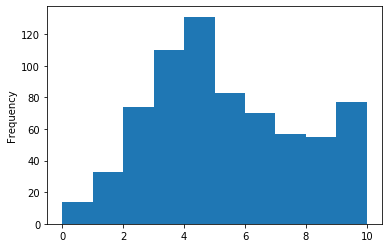

In [67]:
#frequency distribution of overall autism scores, not grouped
res.plot(kind='hist', x='result')
plt.show()